In [3]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from operator import itemgetter
import torchvision.transforms

In [6]:
image_directory = '../Task01_BrainTumour/extracted/imagesTr/%i.npy'
label_directory = '../Task01_BrainTumour/extracted/labelsTr/%i.npy'
def get_image_and_target(i):
    return np.load(image_directory % i), np.load(label_directory % i)

In [9]:
patients = []
for i in range(100):
    patients.append(get_image_and_target(i))


In [10]:
print(patients[5][0].shape)

(4, 155, 240, 240)


In [12]:
heatmap_image = np.zeros((240, 240))
for i in range(100):
    for j in range(4):
        for k in range(155):
            heatmap_image = heatmap_image + patients[i][0][j][k]

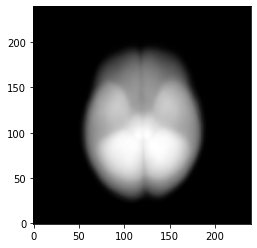

In [13]:
plt.imshow(heatmap_image, cmap="gray", origin="lower")

In [5]:
def resize_sample(x, size=256):
    volume, mask = x
    v_shape = volume.shape
    m_shape = mask.shape
    out_shape = (m_shape[0], size, size)
    mask = resize(
        mask,
        output_shape=out_shape,
        order=0,
        mode="constant",
        cval=0,
        anti_aliasing=False,
    )
    out_shape = (v_shape[0], v_shape[1], size, size)
    volume = resize(
        volume,
        output_shape=out_shape,
        order=2,
        mode="constant",
        cval=0,
        anti_aliasing=False,
    )
    return volume, mask

In [46]:
print(patients[1][1].shape)

(155, 240, 240)


In [ ]:
# and access the numpy array:
t1 = sitk.GetArrayFromImage(sitk_t1)
t1.shape

In [ ]:
x_slice = t1[2, 70, :, :]
print(x_slice.shape)

plt.imshow(x_slice, cmap="gray", origin="lower")